In [1]:
# Install required packages (run once)
# %pip install matplotlib networkx plotly kaleido pandas numpy seaborn
%pip install networkx plotly kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import numpy as np
import networkx as nx
from matplotlib.patches import Ellipse, Rectangle, Polygon
import matplotlib.lines as mlines
from datetime import datetime, timedelta
import os

# Set style for professional diagrams
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'

# Twigane brand colors
TWIGANE_COLORS = {
    'primary': '#667eea',
    'secondary': '#764ba2', 
    'accent': '#10b981',
    'warning': '#f59e0b',
    'error': '#ef4444',
    'light_blue': '#e0f2fe',
    'light_gray': '#f8f9fa'
}

# Create diagrams directory
if not os.path.exists('diagrams'):
    os.makedirs('diagrams')
    print("✅ Created diagrams directory")


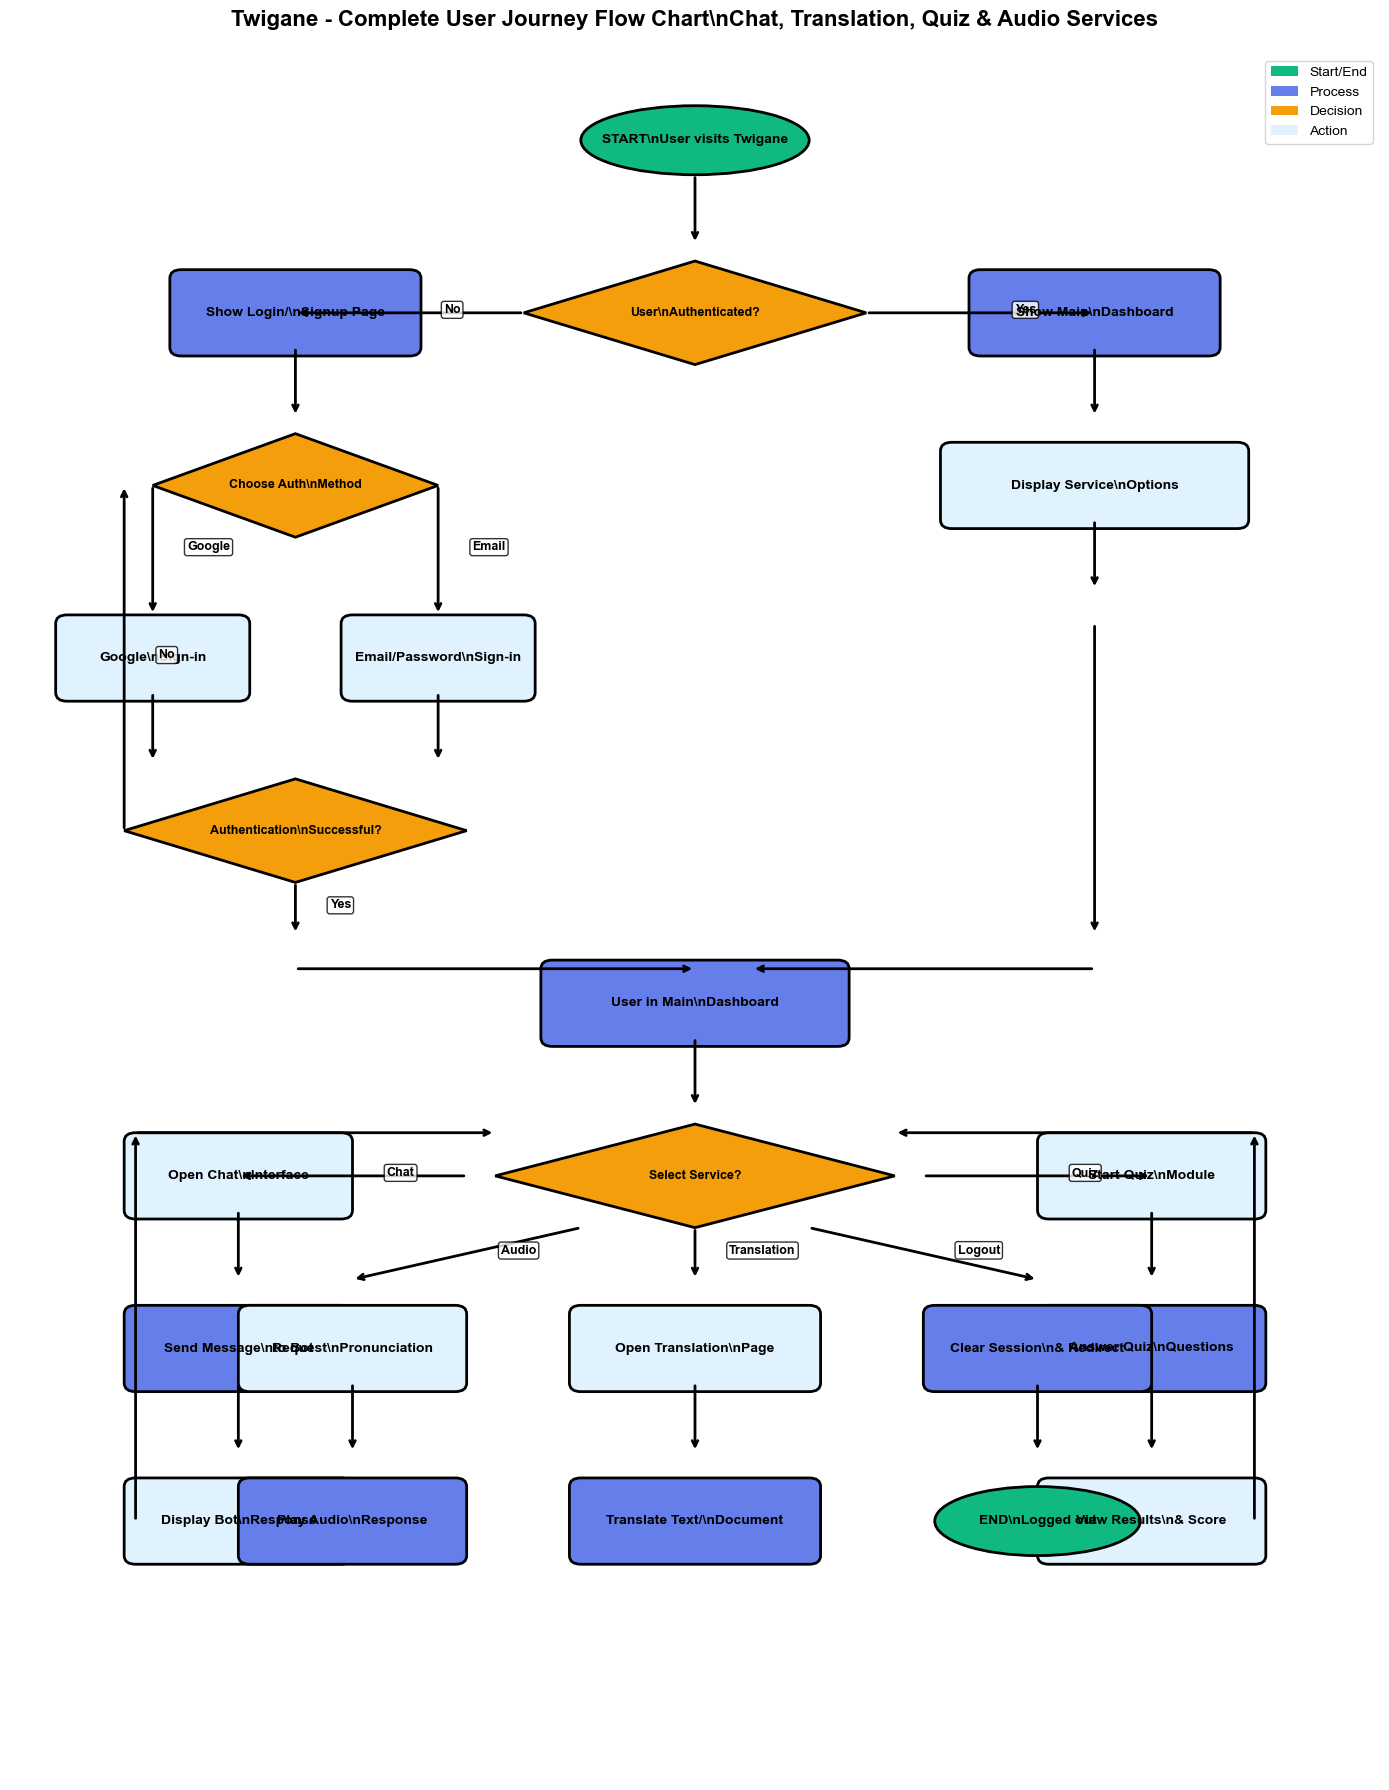

In [3]:
def create_flowchart():
    fig, ax = plt.subplots(1, 1, figsize=(14, 18))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 20)
    ax.axis('off')
    
    # Define colors using Twigane brand
    start_end_color = TWIGANE_COLORS['accent']
    process_color = TWIGANE_COLORS['primary']
    decision_color = TWIGANE_COLORS['warning']
    action_color = TWIGANE_COLORS['light_blue']
    
    # Helper function to create different shapes
    def add_oval(x, y, width, height, text, color):
        oval = Ellipse((x, y), width, height, facecolor=color, edgecolor='black', linewidth=2)
        ax.add_patch(oval)
        ax.text(x, y, text, ha='center', va='center', fontsize=10, weight='bold', wrap=True)
    
    def add_rectangle(x, y, width, height, text, color):
        rect = FancyBboxPatch((x-width/2, y-height/2), width, height, 
                             boxstyle="round,pad=0.1", facecolor=color, 
                             edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y, text, ha='center', va='center', fontsize=10, weight='bold', wrap=True)
    
    def add_diamond(x, y, width, height, text, color):
        diamond = Polygon([(x, y+height/2), (x+width/2, y), (x, y-height/2), (x-width/2, y)], 
                         facecolor=color, edgecolor='black', linewidth=2)
        ax.add_patch(diamond)
        ax.text(x, y, text, ha='center', va='center', fontsize=9, weight='bold', wrap=True)
    
    def add_arrow(x1, y1, x2, y2, text=''):
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        if text:
            mid_x, mid_y = (x1+x2)/2, (y1+y2)/2
            ax.text(mid_x+0.3, mid_y, text, fontsize=9, weight='bold', 
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
    
    # Flow chart elements - Updated for complete Twigane system
    add_oval(6, 19, 2, 0.8, 'START\\nUser visits Twigane', start_end_color)
    add_arrow(6, 18.6, 6, 17.8)
    
    add_diamond(6, 17, 3, 1.2, 'User\\nAuthenticated?', decision_color)
    add_arrow(4.5, 17, 2.5, 17, 'No')
    add_arrow(7.5, 17, 9.5, 17, 'Yes')
    
    # Authentication path (left side)
    add_rectangle(2.5, 17, 2, 0.8, 'Show Login/\\nSignup Page', process_color)
    add_arrow(2.5, 16.6, 2.5, 15.8)
    
    add_diamond(2.5, 15, 2.5, 1.2, 'Choose Auth\\nMethod', decision_color)
    add_arrow(1.25, 15, 1.25, 13.5, 'Google')
    add_arrow(3.75, 15, 3.75, 13.5, 'Email')
    
    add_rectangle(1.25, 13, 1.5, 0.8, 'Google\\nSign-in', action_color)
    add_rectangle(3.75, 13, 1.5, 0.8, 'Email/Password\\nSign-in', action_color)
    
    add_arrow(1.25, 12.6, 1.25, 11.8)
    add_arrow(3.75, 12.6, 3.75, 11.8)
    
    add_diamond(2.5, 11, 3, 1.2, 'Authentication\\nSuccessful?', decision_color)
    add_arrow(2.5, 10.4, 2.5, 9.8, 'Yes')
    add_arrow(1, 11, 1, 15, 'No')
    
    # Main dashboard flow (right side)
    add_rectangle(9.5, 17, 2, 0.8, 'Show Main\\nDashboard', process_color)
    add_arrow(9.5, 16.6, 9.5, 15.8)
    
    add_rectangle(9.5, 15, 2.5, 0.8, 'Display Service\\nOptions', action_color)
    add_arrow(9.5, 14.6, 9.5, 13.8)
    
    # Merge authentication paths
    add_arrow(2.5, 9.4, 6, 9.4)
    add_arrow(9.5, 13.4, 9.5, 9.8)
    add_arrow(9.5, 9.4, 6.5, 9.4)
    
    add_rectangle(6, 9, 2.5, 0.8, 'User in Main\\nDashboard', process_color)
    add_arrow(6, 8.6, 6, 7.8)
    
    add_diamond(6, 7, 3.5, 1.2, 'Select Service?', decision_color)
    
    # Service selection - Updated for all Twigane services
    add_arrow(4, 7, 2, 7, 'Chat')
    add_arrow(6, 6.4, 6, 5.8, 'Translation')
    add_arrow(8, 7, 10, 7, 'Quiz')
    add_arrow(5, 6.4, 3, 5.8, 'Audio')
    add_arrow(7, 6.4, 9, 5.8, 'Logout')
    
    # Chat Service
    add_rectangle(2, 7, 1.8, 0.8, 'Open Chat\\nInterface', action_color)
    add_arrow(2, 6.6, 2, 5.8)
    add_rectangle(2, 5, 1.8, 0.8, 'Send Message\\nto Bot', process_color)
    add_arrow(2, 4.6, 2, 3.8)
    add_rectangle(2, 3, 1.8, 0.8, 'Display Bot\\nResponse', action_color)
    
    # Translation Service
    add_rectangle(6, 5, 2, 0.8, 'Open Translation\\nPage', action_color)
    add_arrow(6, 4.6, 6, 3.8)
    add_rectangle(6, 3, 2, 0.8, 'Translate Text/\\nDocument', process_color)
    
    # Quiz Service
    add_rectangle(10, 7, 1.8, 0.8, 'Start Quiz\\nModule', action_color)
    add_arrow(10, 6.6, 10, 5.8)
    add_rectangle(10, 5, 1.8, 0.8, 'Answer Quiz\\nQuestions', process_color)
    add_arrow(10, 4.6, 10, 3.8)
    add_rectangle(10, 3, 1.8, 0.8, 'View Results\\n& Score', action_color)
    
    # Audio Service
    add_rectangle(3, 5, 1.8, 0.8, 'Request\\nPronunciation', action_color)
    add_arrow(3, 4.6, 3, 3.8)
    add_rectangle(3, 3, 1.8, 0.8, 'Play Audio\\nResponse', process_color)
    
    # Logout path
    add_rectangle(9, 5, 1.8, 0.8, 'Clear Session\\n& Redirect', process_color)
    add_arrow(9, 4.6, 9, 3.8)
    add_oval(9, 3, 1.8, 0.8, 'END\\nLogged out', start_end_color)
    
    # Loop back arrows for continuing to use services
    add_arrow(1.1, 3, 1.1, 7.5, '')
    add_arrow(1.1, 7.5, 4.25, 7.5, '')
    add_arrow(10.9, 3, 10.9, 7.5, '')
    add_arrow(10.9, 7.5, 7.75, 7.5, '')
    
    plt.title('Twigane - Complete User Journey Flow Chart\\nChat, Translation, Quiz & Audio Services', 
             fontsize=16, weight='bold', pad=20)
    
    # Add legend
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, facecolor=start_end_color, label='Start/End'),
        plt.Rectangle((0, 0), 1, 1, facecolor=process_color, label='Process'),
        plt.Rectangle((0, 0), 1, 1, facecolor=decision_color, label='Decision'),
        plt.Rectangle((0, 0), 1, 1, facecolor=action_color, label='Action')
    ]
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.savefig('diagrams/user_journey_flowchart.png', dpi=300, bbox_inches='tight')
    plt.show()

create_flowchart()


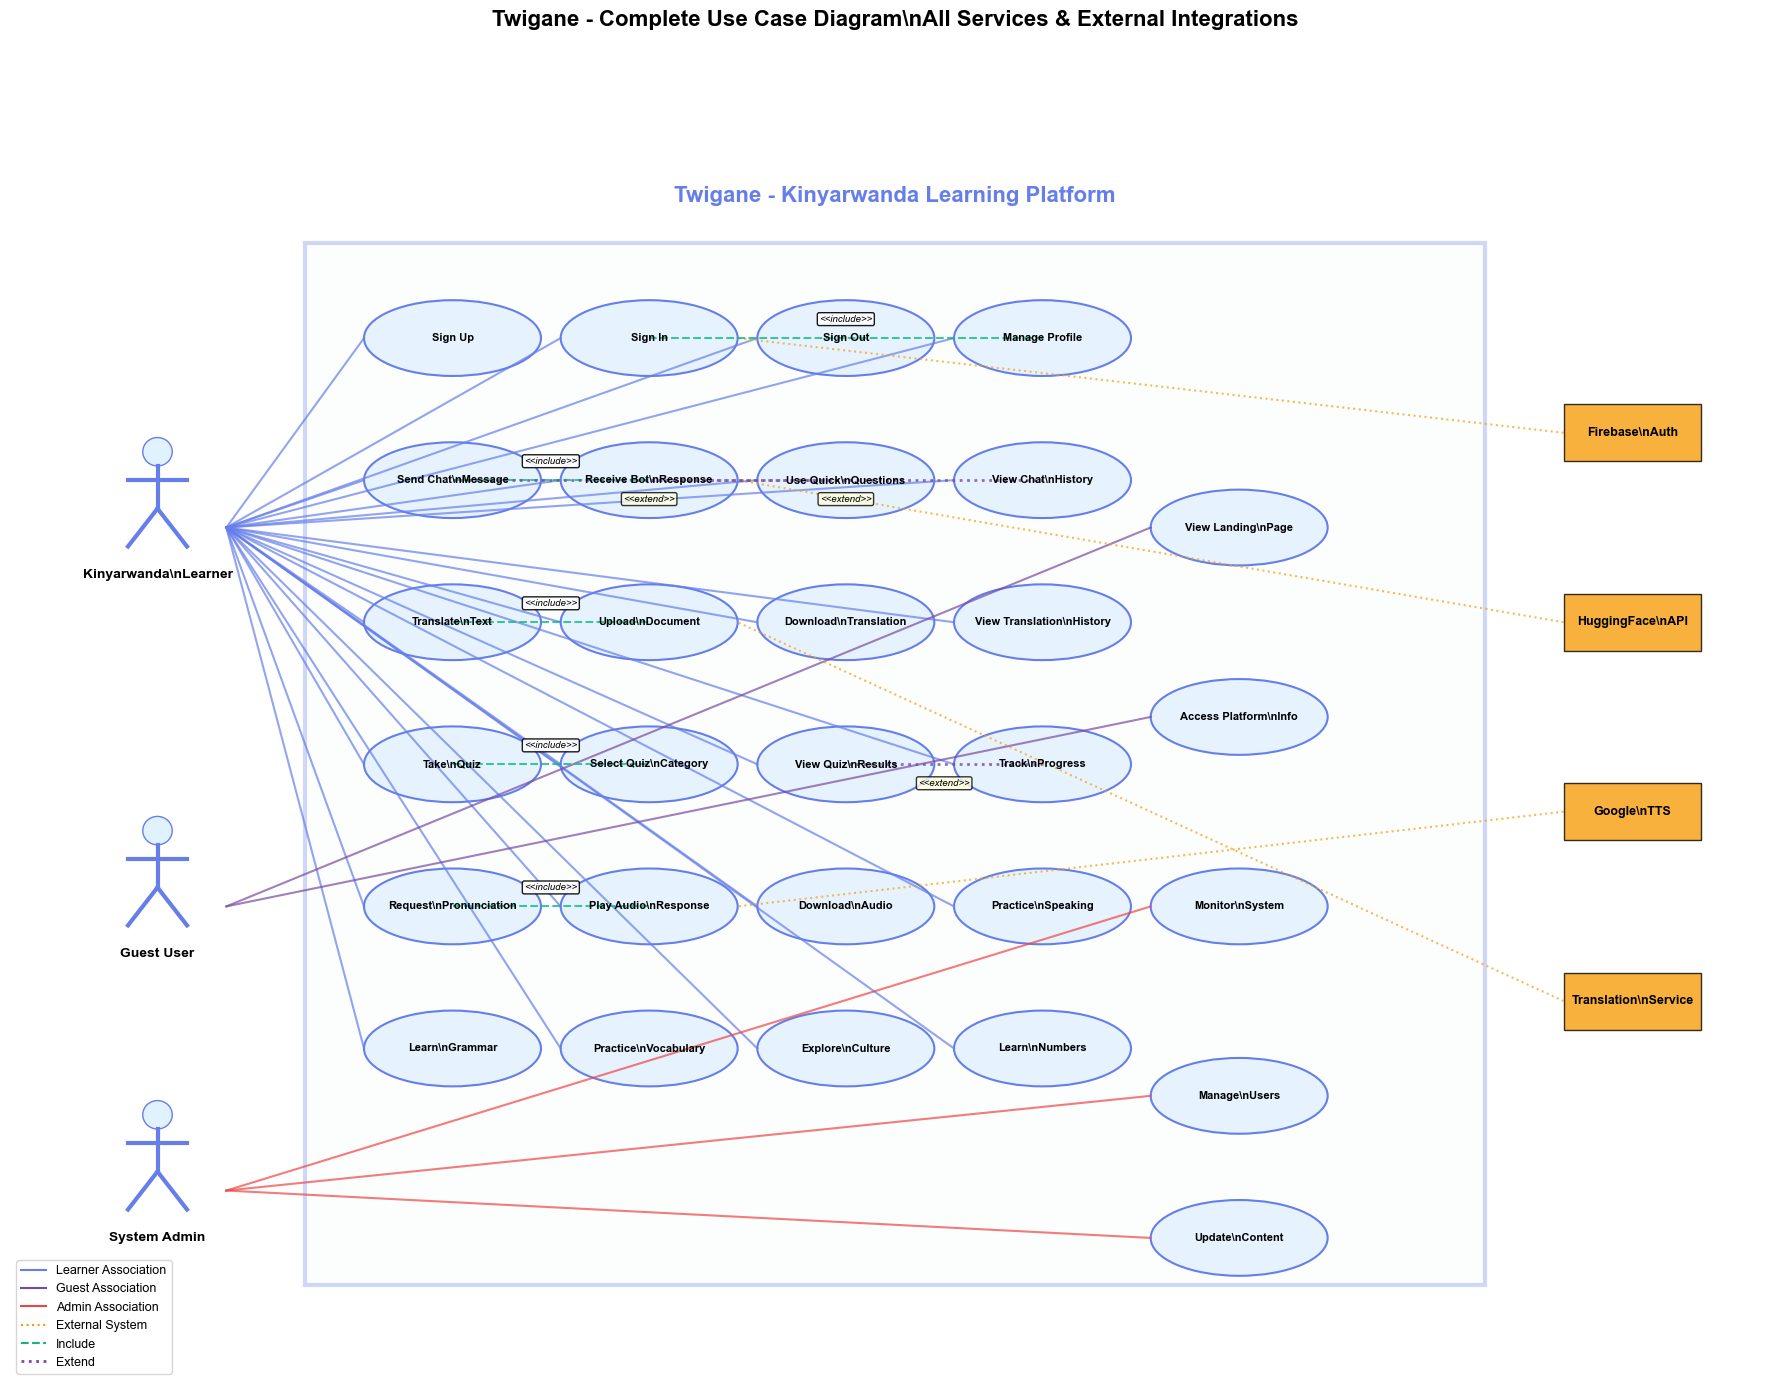

In [4]:
def create_use_case_diagram():
    fig, ax = plt.subplots(1, 1, figsize=(18, 14))
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 14)
    ax.axis('off')
    
    # Colors using Twigane brand
    actor_color = TWIGANE_COLORS['light_blue']
    use_case_color = '#E6F3FF'
    system_color = TWIGANE_COLORS['light_gray']
    
    # System boundary
    system_rect = Rectangle((3, 1), 12, 11, linewidth=3, edgecolor=TWIGANE_COLORS['primary'], 
                           facecolor=system_color, alpha=0.3)
    ax.add_patch(system_rect)
    ax.text(9, 12.5, 'Twigane - Kinyarwanda Learning Platform', ha='center', va='center', 
           fontsize=16, weight='bold', color=TWIGANE_COLORS['primary'])
    
    # Actors
    def draw_actor(x, y, name):
        # Head
        head = plt.Circle((x, y+0.8), 0.15, facecolor=actor_color, edgecolor=TWIGANE_COLORS['primary'])
        ax.add_patch(head)
        # Body
        ax.plot([x, x], [y+0.65, y+0.2], color=TWIGANE_COLORS['primary'], linewidth=3)
        # Arms
        ax.plot([x-0.3, x+0.3], [y+0.5, y+0.5], color=TWIGANE_COLORS['primary'], linewidth=3)
        # Legs
        ax.plot([x, x-0.3], [y+0.2, y-0.2], color=TWIGANE_COLORS['primary'], linewidth=3)
        ax.plot([x, x+0.3], [y+0.2, y-0.2], color=TWIGANE_COLORS['primary'], linewidth=3)
        # Name
        ax.text(x, y-0.5, name, ha='center', va='center', fontsize=10, weight='bold')
    
    # External System
    def draw_external_system(x, y, name):
        rect = Rectangle((x-0.7, y-0.3), 1.4, 0.6, facecolor=TWIGANE_COLORS['warning'], 
                        edgecolor='black', alpha=0.8)
        ax.add_patch(rect)
        ax.text(x, y, name, ha='center', va='center', fontsize=9, weight='bold')
    
    # Draw actors
    draw_actor(1.5, 9, 'Kinyarwanda\\nLearner')
    draw_actor(1.5, 5, 'Guest User')
    draw_actor(1.5, 2, 'System Admin')
    
    # External systems
    draw_external_system(16.5, 10, 'Firebase\\nAuth')
    draw_external_system(16.5, 8, 'HuggingFace\\nAPI')
    draw_external_system(16.5, 6, 'Google\\nTTS')
    draw_external_system(16.5, 4, 'Translation\\nService')
    
    # Use cases (ellipses) - Updated for complete Twigane system
    use_cases = [
        # Authentication
        (4.5, 11, 'Sign Up'),
        (6.5, 11, 'Sign In'),
        (8.5, 11, 'Sign Out'),
        (10.5, 11, 'Manage Profile'),
        
        # Chat Service
        (4.5, 9.5, 'Send Chat\\nMessage'),
        (6.5, 9.5, 'Receive Bot\\nResponse'),
        (8.5, 9.5, 'Use Quick\\nQuestions'),
        (10.5, 9.5, 'View Chat\\nHistory'),
        
        # Translation Service
        (4.5, 8, 'Translate\\nText'),
        (6.5, 8, 'Upload\\nDocument'),
        (8.5, 8, 'Download\\nTranslation'),
        (10.5, 8, 'View Translation\\nHistory'),
        
        # Quiz Service
        (4.5, 6.5, 'Take\\nQuiz'),
        (6.5, 6.5, 'Select Quiz\\nCategory'),
        (8.5, 6.5, 'View Quiz\\nResults'),
        (10.5, 6.5, 'Track\\nProgress'),
        
        # Audio/Pronunciation Service
        (4.5, 5, 'Request\\nPronunciation'),
        (6.5, 5, 'Play Audio\\nResponse'),
        (8.5, 5, 'Download\\nAudio'),
        (10.5, 5, 'Practice\\nSpeaking'),
        
        # Learning Content
        (4.5, 3.5, 'Learn\\nGrammar'),
        (6.5, 3.5, 'Practice\\nVocabulary'),
        (8.5, 3.5, 'Explore\\nCulture'),
        (10.5, 3.5, 'Learn\\nNumbers'),
        
        # Guest & Admin
        (12.5, 9, 'View Landing\\nPage'),
        (12.5, 7, 'Access Platform\\nInfo'),
        (12.5, 5, 'Monitor\\nSystem'),
        (12.5, 3, 'Manage\\nUsers'),
        (12.5, 1.5, 'Update\\nContent')
    ]
    
    ellipses = []
    for x, y, text in use_cases:
        ellipse = Ellipse((x, y), 1.8, 0.8, facecolor=use_case_color, 
                         edgecolor=TWIGANE_COLORS['primary'], linewidth=1.5)
        ax.add_patch(ellipse)
        ax.text(x, y, text, ha='center', va='center', fontsize=8, weight='bold')
        ellipses.append((x, y, text))
    
    # Connections (Kinyarwanda Learner)
    learner_connections = [
        # Authentication
        (4.5, 11), (6.5, 11), (8.5, 11), (10.5, 11),
        # Chat
        (4.5, 9.5), (6.5, 9.5), (8.5, 9.5), (10.5, 9.5),
        # Translation 
        (4.5, 8), (6.5, 8), (8.5, 8), (10.5, 8),
        # Quiz
        (4.5, 6.5), (6.5, 6.5), (8.5, 6.5), (10.5, 6.5),
        # Audio
        (4.5, 5), (6.5, 5), (8.5, 5), (10.5, 5),
        # Learning
        (4.5, 3.5), (6.5, 3.5), (8.5, 3.5), (10.5, 3.5)
    ]
    
    for x, y in learner_connections:
        ax.plot([2.2, x-0.9], [9, y], color=TWIGANE_COLORS['primary'], linewidth=1.5, alpha=0.7)
    
    # Connections (Guest User)
    guest_connections = [(12.5, 9), (12.5, 7)]
    for x, y in guest_connections:
        ax.plot([2.2, x-0.9], [5, y], color=TWIGANE_COLORS['secondary'], linewidth=1.5, alpha=0.7)
    
    # Connections (System Admin)
    admin_connections = [(12.5, 5), (12.5, 3), (12.5, 1.5)]
    for x, y in admin_connections:
        ax.plot([2.2, x-0.9], [2, y], color=TWIGANE_COLORS['error'], linewidth=1.5, alpha=0.7)
    
    # External system connections
    external_connections = [
        ((16.5, 10), (6.5, 11)),  # Firebase to Sign In
        ((16.5, 8), (6.5, 9.5)),  # HuggingFace to Chat
        ((16.5, 6), (6.5, 5)),    # Google TTS to Audio
        ((16.5, 4), (6.5, 8))     # Translation Service to Translate
    ]
    
    for (ex_x, ex_y), (uc_x, uc_y) in external_connections:
        ax.plot([ex_x-0.7, uc_x+0.9], [ex_y, uc_y], 
                color=TWIGANE_COLORS['warning'], linewidth=1.5, alpha=0.7, linestyle=':')
    
    # Include relationships (dashed lines) - Updated for Twigane
    include_relationships = [
        ((6.5, 11), (10.5, 11), '<<include>>'),     # Sign In includes Manage Profile
        ((4.5, 9.5), (6.5, 9.5), '<<include>>'),   # Send Message includes Receive Response
        ((4.5, 5), (6.5, 5), '<<include>>'),       # Request Pronunciation includes Play Audio
        ((4.5, 8), (6.5, 8), '<<include>>'),       # Translate includes Upload Document
        ((4.5, 6.5), (6.5, 6.5), '<<include>>'),   # Take Quiz includes Select Category
    ]
    
    for (x1, y1), (x2, y2), label in include_relationships:
        ax.plot([x1, x2], [y1, y2], color=TWIGANE_COLORS['accent'], 
                linestyle='--', linewidth=1.5, alpha=0.8)
        mid_x, mid_y = (x1+x2)/2, (y1+y2)/2
        ax.text(mid_x, mid_y+0.2, label, ha='center', va='center', fontsize=7, 
               style='italic', bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))
    
    # Extend relationships - Updated for Twigane
    extend_relationships = [
        ((8.5, 9.5), (4.5, 9.5), '<<extend>>'),  # Quick Questions extends Send Message
        ((10.5, 9.5), (6.5, 9.5), '<<extend>>'), # Chat History extends Receive Response
        ((10.5, 6.5), (8.5, 6.5), '<<extend>>'), # Track Progress extends View Results
    ]
    
    for (x1, y1), (x2, y2), label in extend_relationships:
        ax.plot([x1, x2], [y1, y2], color=TWIGANE_COLORS['secondary'], 
                linestyle=':', linewidth=2, alpha=0.8)
        mid_x, mid_y = (x1+x2)/2, (y1+y2)/2
        ax.text(mid_x, mid_y-0.2, label, ha='center', va='center', fontsize=7, 
               style='italic', bbox=dict(boxstyle="round,pad=0.2", facecolor='lightyellow', alpha=0.8))
    
    plt.title('Twigane - Complete Use Case Diagram\\nAll Services & External Integrations', 
             fontsize=16, weight='bold', pad=20)
    
    # Legend
    legend_elements = [
        mlines.Line2D([], [], color=TWIGANE_COLORS['primary'], linewidth=1.5, label='Learner Association'),
        mlines.Line2D([], [], color=TWIGANE_COLORS['secondary'], linewidth=1.5, label='Guest Association'), 
        mlines.Line2D([], [], color=TWIGANE_COLORS['error'], linewidth=1.5, label='Admin Association'),
        mlines.Line2D([], [], color=TWIGANE_COLORS['warning'], linewidth=1.5, linestyle=':', label='External System'),
        mlines.Line2D([], [], color=TWIGANE_COLORS['accent'], linewidth=1.5, linestyle='--', label='Include'),
        mlines.Line2D([], [], color=TWIGANE_COLORS['secondary'], linewidth=2, linestyle=':', label='Extend')
    ]
    ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0), fontsize=9)
    
    plt.tight_layout()
    plt.savefig('diagrams/use_case_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()

create_use_case_diagram()


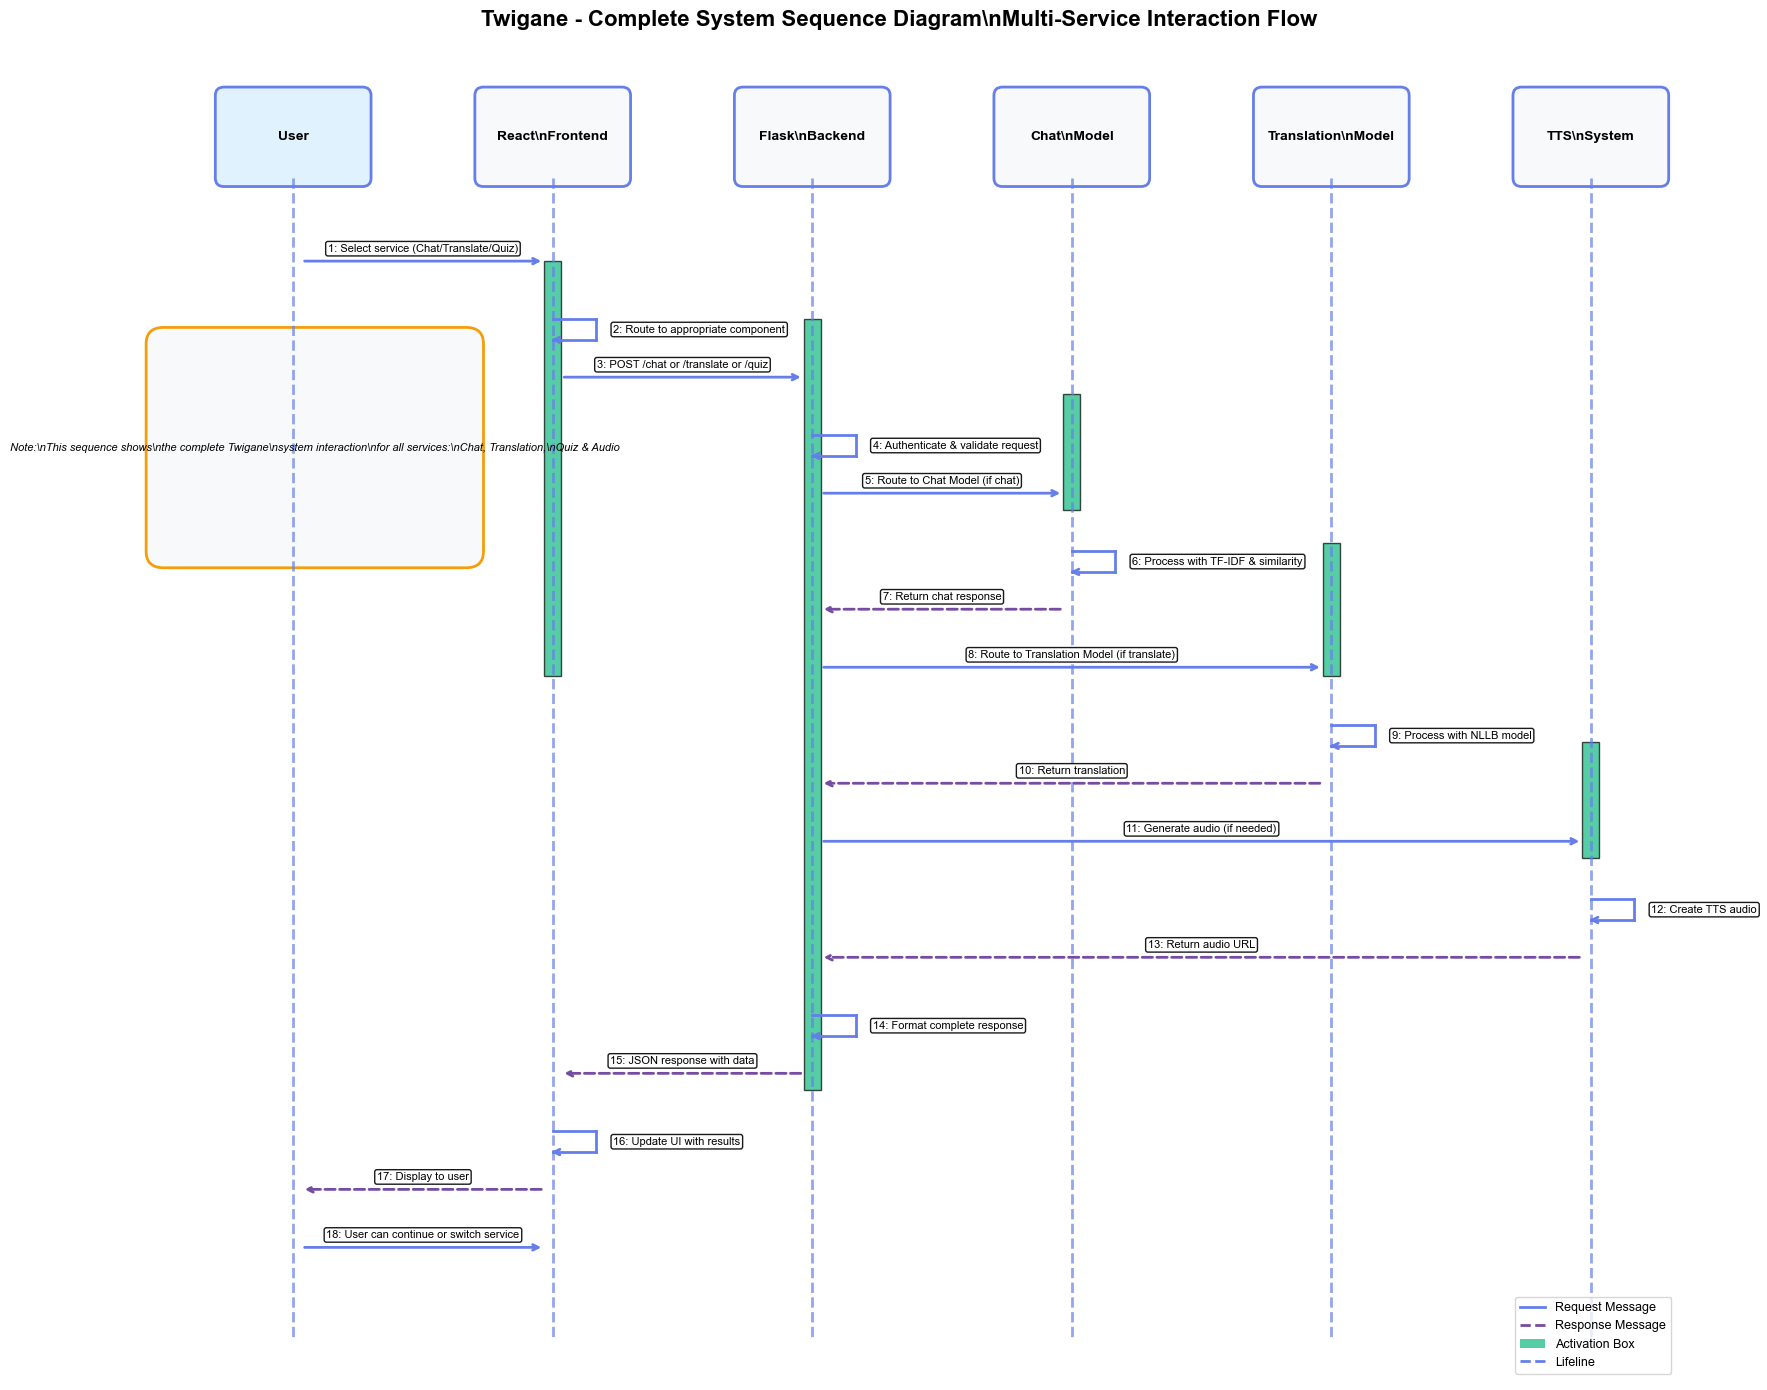

In [5]:
def create_sequence_diagram():
    fig, ax = plt.subplots(1, 1, figsize=(18, 14))
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 16)
    ax.axis('off')
    
    # Colors using Twigane brand
    actor_color = TWIGANE_COLORS['light_blue']
    object_color = TWIGANE_COLORS['light_gray']
    message_color = TWIGANE_COLORS['primary']
    return_color = TWIGANE_COLORS['secondary']
    
    # Actors and Objects - Updated for complete Twigane system
    actors = [
        (2, 'User'),
        (5, 'React\\nFrontend'),
        (8, 'Flask\\nBackend'),
        (11, 'Chat\\nModel'),
        (14, 'Translation\\nModel'),
        (17, 'TTS\\nSystem')
    ]
    
    # Draw actor boxes and lifelines
    for x, name in actors:
        # Actor box
        if name == 'User':
            color = actor_color
        else:
            color = object_color
        
        rect = FancyBboxPatch((x-0.8, 14.5), 1.6, 1, boxstyle="round,pad=0.1", 
                             facecolor=color, edgecolor=TWIGANE_COLORS['primary'], linewidth=2)
        ax.add_patch(rect)
        ax.text(x, 15, name, ha='center', va='center', fontsize=10, weight='bold')
        
        # Lifeline
        ax.plot([x, x], [14.5, 0.5], color=TWIGANE_COLORS['primary'], 
                linestyle='--', linewidth=2, alpha=0.7)
    
    # Sequence steps
    y_pos = 13.5
    step_height = 0.7
    
    def draw_message(from_x, to_x, y, text, color=message_color, style='->'):
        if style == '->':
            ax.annotate('', xy=(to_x-0.1, y), xytext=(from_x+0.1, y),
                       arrowprops=dict(arrowstyle='->', lw=2, color=color))
        else:  # return message
            ax.annotate('', xy=(to_x+0.1, y), xytext=(from_x-0.1, y),
                       arrowprops=dict(arrowstyle='->', lw=2, color=color, linestyle='--'))
        
        mid_x = (from_x + to_x) / 2
        ax.text(mid_x, y+0.15, text, ha='center', va='center', fontsize=8, 
               bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))
    
    def draw_activation(x, y_start, y_end):
        rect = Rectangle((x-0.1, y_end), 0.2, y_start-y_end, 
                        facecolor=TWIGANE_COLORS['accent'], edgecolor='black', alpha=0.7)
        ax.add_patch(rect)
    
    # Enhanced sequence of messages for complete Twigane system
    messages = [
        (2, 5, '1: Select service (Chat/Translate/Quiz)', message_color, '->'),
        (5, 5, '2: Route to appropriate component', message_color, 'self'),
        (5, 8, '3: POST /chat or /translate or /quiz', message_color, '->'),
        (8, 8, '4: Authenticate & validate request', message_color, 'self'),
        (8, 11, '5: Route to Chat Model (if chat)', message_color, '->'),
        (11, 11, '6: Process with TF-IDF & similarity', message_color, 'self'),
        (11, 8, '7: Return chat response', return_color, '<-'),
        (8, 14, '8: Route to Translation Model (if translate)', message_color, '->'),
        (14, 14, '9: Process with NLLB model', message_color, 'self'),
        (14, 8, '10: Return translation', return_color, '<-'),
        (8, 17, '11: Generate audio (if needed)', message_color, '->'),
        (17, 17, '12: Create TTS audio', message_color, 'self'),
        (17, 8, '13: Return audio URL', return_color, '<-'),
        (8, 8, '14: Format complete response', message_color, 'self'),
        (8, 5, '15: JSON response with data', return_color, '<-'),
        (5, 5, '16: Update UI with results', message_color, 'self'),
        (5, 2, '17: Display to user', return_color, '<-'),
        (2, 5, '18: User can continue or switch service', message_color, '->')
    ]
    
    for i, (from_x, to_x, text, color, style) in enumerate(messages):
        y = y_pos - i * step_height
        
        if style == 'self':
            # Self message (loop)
            ax.plot([from_x, from_x+0.5], [y, y], color=color, linewidth=2)
            ax.plot([from_x+0.5, from_x+0.5], [y, y-0.25], color=color, linewidth=2)
            ax.plot([from_x+0.5, from_x], [y-0.25, y-0.25], color=color, linewidth=2)
            ax.annotate('', xy=(from_x-0.05, y-0.25), xytext=(from_x+0.05, y-0.25),
                       arrowprops=dict(arrowstyle='->', lw=2, color=color))
            ax.text(from_x+0.7, y-0.125, text, ha='left', va='center', fontsize=8,
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))
        else:
            draw_message(from_x, to_x, y, text, color, style)
    
    # Draw activation boxes - Updated for new system
    activations = [
        (5, 13.5, 8.5),   # Frontend active throughout
        (8, 12.8, 3.5),   # Backend active during processing
        (11, 11.9, 10.5), # Chat Model active
        (14, 10.1, 8.5),  # Translation Model active
        (17, 7.7, 6.3),   # TTS System active
    ]
    
    for x, y_start, y_end in activations:
        draw_activation(x, y_start, y_end)
    
    # Add notes
    note_box = FancyBboxPatch((0.5, 10), 3.5, 2.5, boxstyle="round,pad=0.2", 
                             facecolor=TWIGANE_COLORS['light_gray'], 
                             edgecolor=TWIGANE_COLORS['warning'], linewidth=2)
    ax.add_patch(note_box)
    ax.text(2.25, 11.25, 'Note:\\nThis sequence shows\\nthe complete Twigane\\nsystem interaction\\nfor all services:\\nChat, Translation,\\nQuiz & Audio', 
           ha='center', va='center', fontsize=8, style='italic')
    
    plt.title('Twigane - Complete System Sequence Diagram\\nMulti-Service Interaction Flow', 
             fontsize=16, weight='bold', pad=20)
    
    # Legend
    legend_elements = [
        mlines.Line2D([], [], color=message_color, linewidth=2, label='Request Message'),
        mlines.Line2D([], [], color=return_color, linewidth=2, linestyle='--', label='Response Message'),
        plt.Rectangle((0, 0), 1, 1, facecolor=TWIGANE_COLORS['accent'], alpha=0.7, label='Activation Box'),
        mlines.Line2D([], [], color=TWIGANE_COLORS['primary'], linewidth=2, linestyle='--', label='Lifeline')
    ]
    ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1, 0), fontsize=9)
    
    plt.tight_layout()
    plt.savefig('diagrams/sequence_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()

create_sequence_diagram()


🔄 Generating Block Diagram...


/var/folders/b6/79f21ljs2g1fq_qgkdcgtry40000gn/T/ipykernel_78095/2992340444.py:94: UserWarning: Glyph 128488 (\N{LEFT SPEECH BUBBLE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b6/79f21ljs2g1fq_qgkdcgtry40000gn/T/ipykernel_78095/2992340444.py:94: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b6/79f21ljs2g1fq_qgkdcgtry40000gn/T/ipykernel_78095/2992340444.py:94: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b6/79f21ljs2g1fq_qgkdcgtry40000gn/T/ipykernel_78095/2992340444.py:94: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b6/79f21ljs2g1fq_qgkdcgtry40000gn/T/ipykernel_78095/2992340444.py:94: UserWarning: Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b6/79f21ljs2g1fq_qgkdcgtry40000gn/T/i

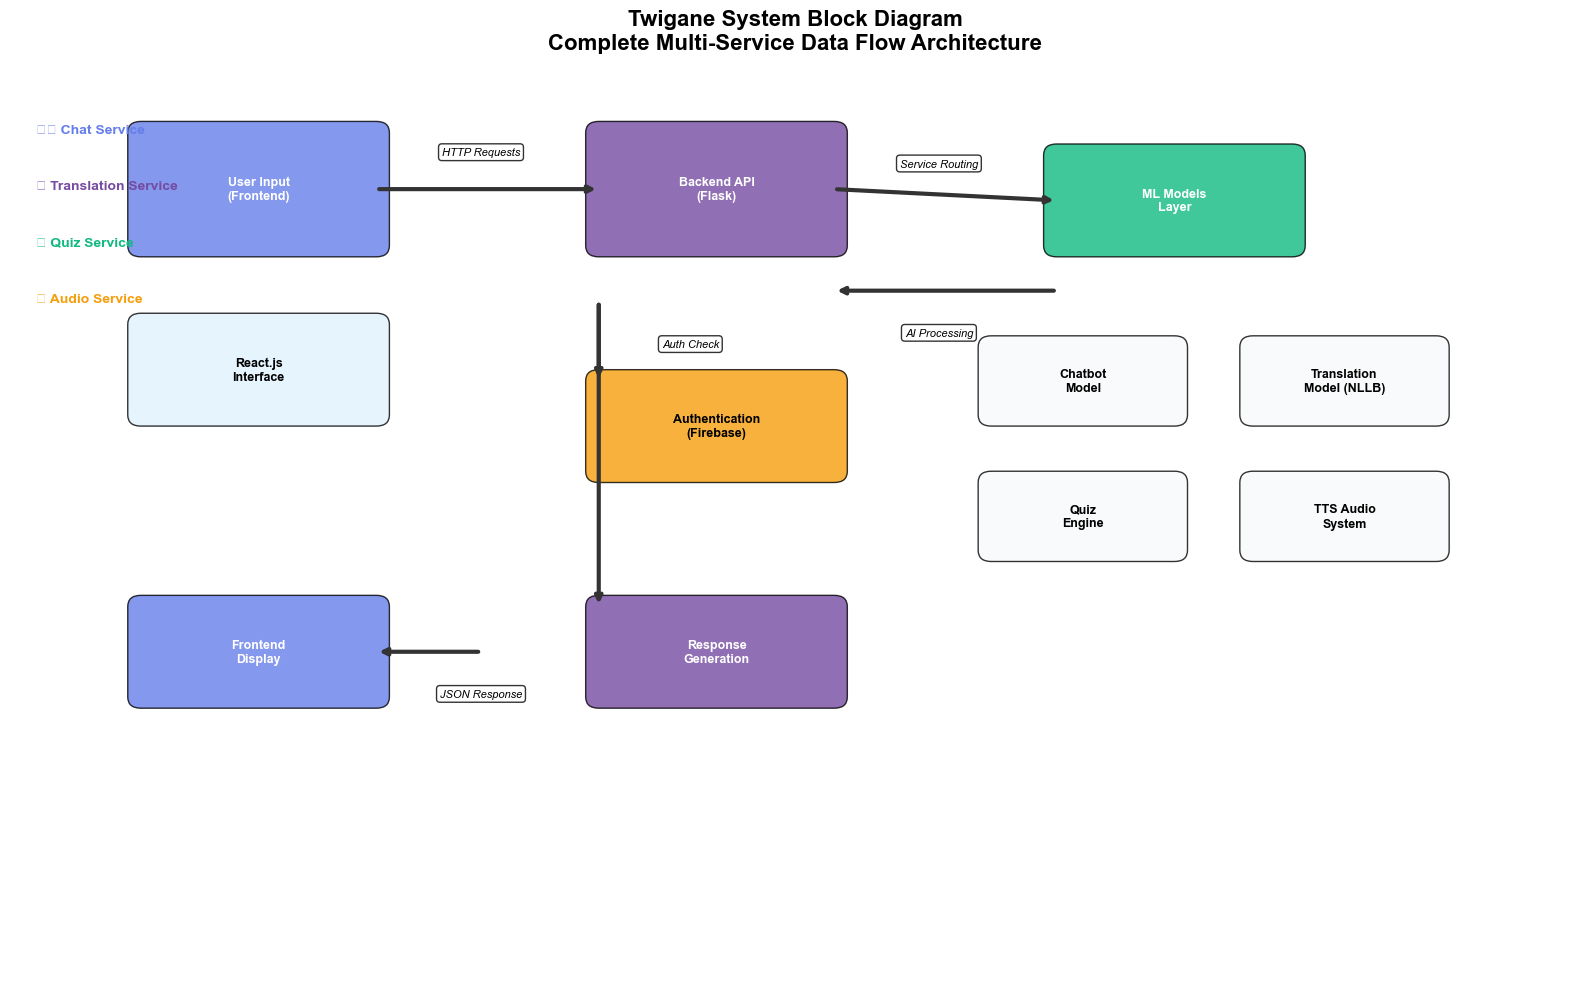

✅ Block Diagram generated


In [6]:
def create_block_diagram():
    print("🔄 Generating Block Diagram...")
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 8)
    ax.axis('off')
    
    # Define blocks
    blocks = [
        {'name': 'User Input\n(Frontend)', 'pos': (1, 6.5), 'size': (1.8, 1), 'color': TWIGANE_COLORS['primary']},
        {'name': 'React.js\nInterface', 'pos': (1, 5), 'size': (1.8, 0.8), 'color': TWIGANE_COLORS['light_blue']},
        {'name': 'Backend API\n(Flask)', 'pos': (4.5, 6.5), 'size': (1.8, 1), 'color': TWIGANE_COLORS['secondary']},
        {'name': 'Authentication\n(Firebase)', 'pos': (4.5, 4.5), 'size': (1.8, 0.8), 'color': TWIGANE_COLORS['warning']},
        
        # ML Models Layer
        {'name': 'ML Models\nLayer', 'pos': (8, 6.5), 'size': (1.8, 0.8), 'color': TWIGANE_COLORS['accent']},
        {'name': 'Chatbot\nModel', 'pos': (7.5, 5), 'size': (1.4, 0.6), 'color': TWIGANE_COLORS['light_gray']},
        {'name': 'Translation\nModel (NLLB)', 'pos': (9.5, 5), 'size': (1.4, 0.6), 'color': TWIGANE_COLORS['light_gray']},
        {'name': 'Quiz\nEngine', 'pos': (7.5, 3.8), 'size': (1.4, 0.6), 'color': TWIGANE_COLORS['light_gray']},
        {'name': 'TTS Audio\nSystem', 'pos': (9.5, 3.8), 'size': (1.4, 0.6), 'color': TWIGANE_COLORS['light_gray']},
        
        # Response Layer
        {'name': 'Response\nGeneration', 'pos': (4.5, 2.5), 'size': (1.8, 0.8), 'color': TWIGANE_COLORS['secondary']},
        {'name': 'Frontend\nDisplay', 'pos': (1, 2.5), 'size': (1.8, 0.8), 'color': TWIGANE_COLORS['primary']}
    ]
    
    # Draw blocks
    for block in blocks:
        rect = FancyBboxPatch(
            block['pos'], block['size'][0], block['size'][1],
            boxstyle="round,pad=0.1",
            facecolor=block['color'],
            edgecolor='black',
            alpha=0.8
        )
        ax.add_patch(rect)
        
        # Add text
        text_color = 'white' if block['color'] in [TWIGANE_COLORS['primary'], TWIGANE_COLORS['secondary'], TWIGANE_COLORS['accent']] else 'black'
        ax.text(
            block['pos'][0] + block['size'][0]/2,
            block['pos'][1] + block['size'][1]/2,
            block['name'],
            ha='center', va='center',
            fontsize=9, fontweight='bold',
            color=text_color
        )
    
    # Draw arrows for data flow
    arrows = [
        # User input flow
        ((2.8, 7), (4.5, 7)),         # Frontend to Backend
        ((6.3, 7), (8, 6.9)),         # Backend to ML Models
        ((8, 6.1), (6.3, 6.1)),       # ML Models back to Backend
        ((4.5, 6), (4.5, 3.3)),       # Backend to Response Generation
        ((3.6, 2.9), (2.8, 2.9)),     # Response to Frontend Display
        
        # Authentication flow
        ((4.5, 6), (4.5, 5.3)),       # Backend to Auth
    ]
    
    for start, end in arrows:
        ax.annotate('', xy=end, xytext=start,
                   arrowprops=dict(arrowstyle='->', lw=3, color='#333333'))
    
    # Add service flow labels
    service_labels = [
        (3.6, 7.3, 'HTTP Requests'),
        (7.1, 7.2, 'Service Routing'),
        (7.1, 5.7, 'AI Processing'),
        (3.6, 2.5, 'JSON Response'),
        (5.2, 5.6, 'Auth Check')
    ]
    
    for x, y, label in service_labels:
        ax.text(x, y, label, ha='center', fontsize=8, style='italic',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Add service type indicators
    services = [
        (0.2, 7.5, '🗨️ Chat Service', TWIGANE_COLORS['primary']),
        (0.2, 7, '🔤 Translation Service', TWIGANE_COLORS['secondary']),
        (0.2, 6.5, '❓ Quiz Service', TWIGANE_COLORS['accent']),
        (0.2, 6, '🔊 Audio Service', TWIGANE_COLORS['warning'])
    ]
    
    for x, y, service, color in services:
        ax.text(x, y, service, ha='left', fontsize=10, fontweight='bold', color=color)
    
    plt.title('Twigane System Block Diagram\nComplete Multi-Service Data Flow Architecture', 
              fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig('diagrams/block_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Block Diagram generated")

create_block_diagram()


🔄 Generating System Architecture Diagram...


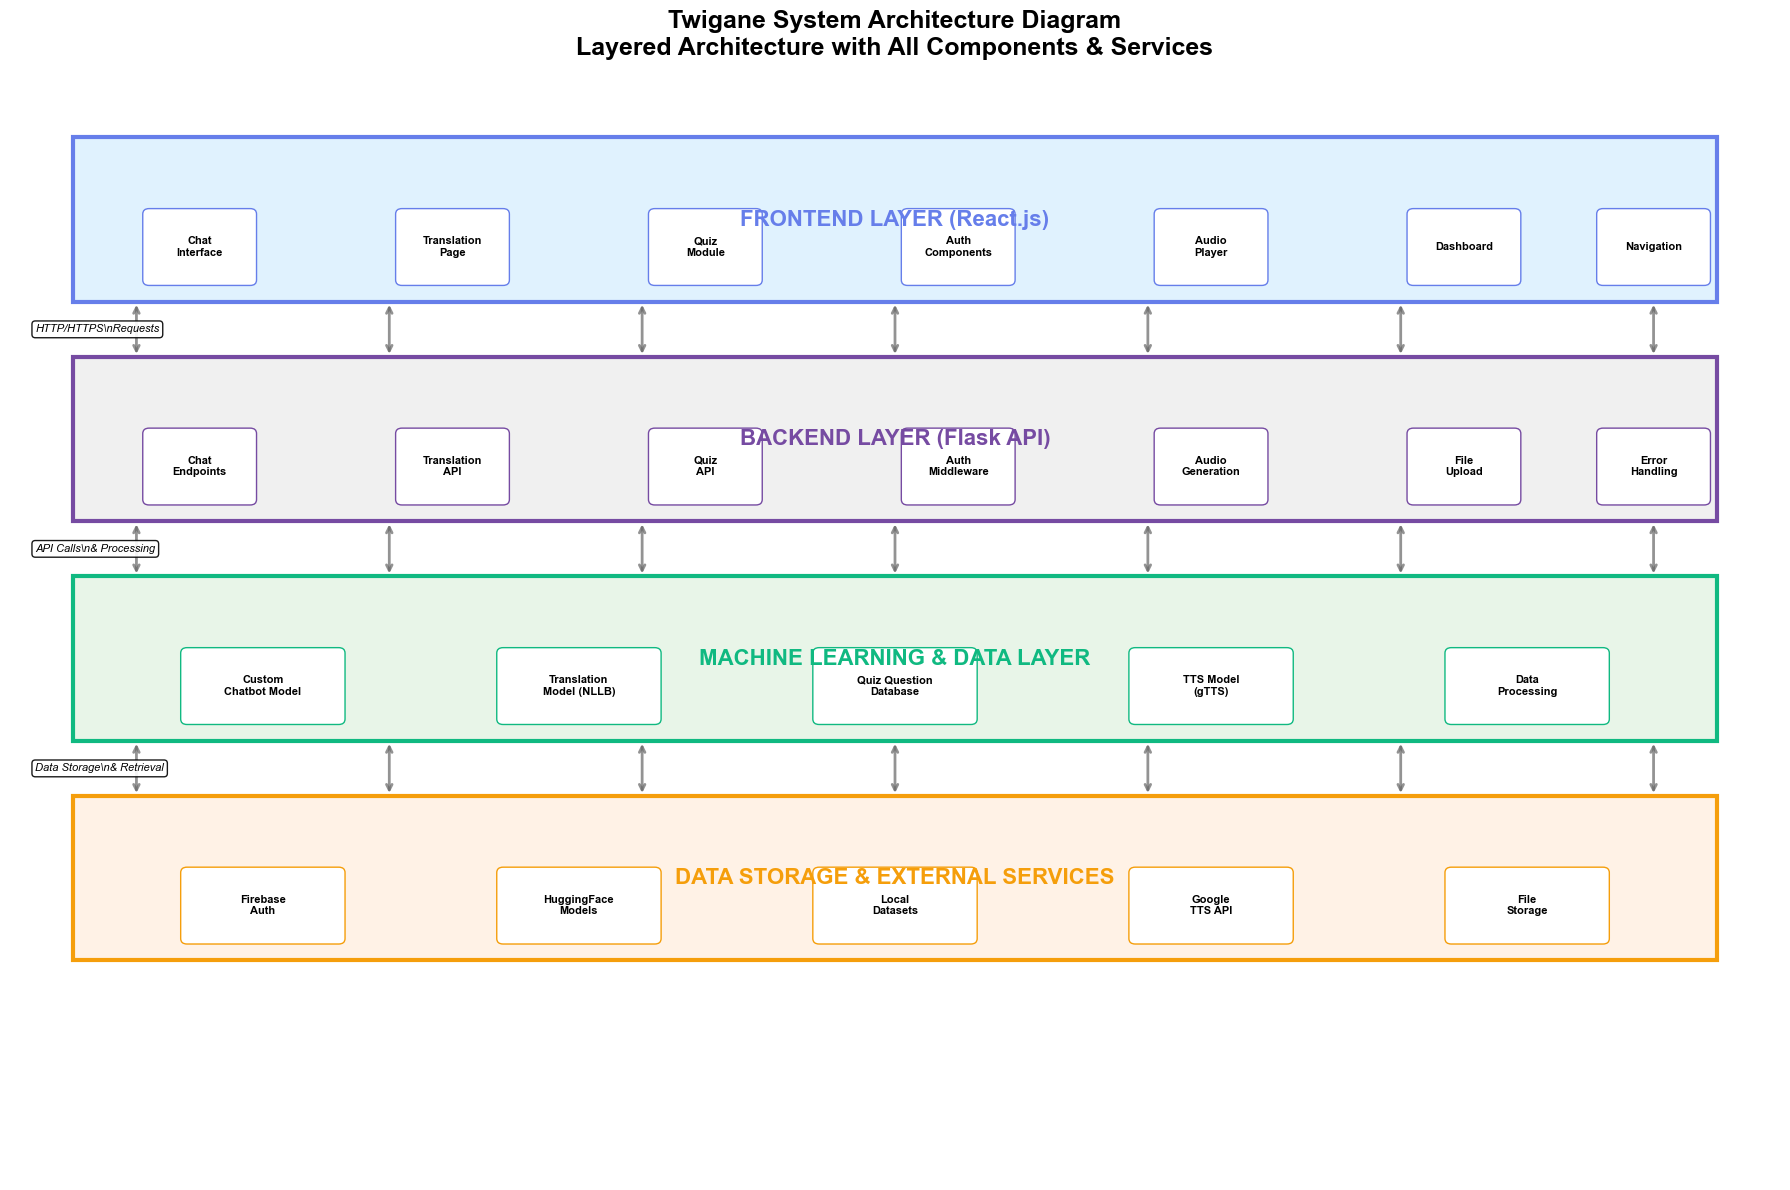

✅ System Architecture Diagram generated


In [7]:
def create_architecture_diagram():
    print("🔄 Generating System Architecture Diagram...")
    
    fig, ax = plt.subplots(1, 1, figsize=(18, 12))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Frontend Layer
    frontend_rect = Rectangle((0.5, 8), 13, 1.5, 
                             facecolor=TWIGANE_COLORS['light_blue'], 
                             edgecolor=TWIGANE_COLORS['primary'], linewidth=3)
    ax.add_patch(frontend_rect)
    ax.text(7, 8.75, 'FRONTEND LAYER (React.js)', ha='center', va='center', 
            fontsize=16, fontweight='bold', color=TWIGANE_COLORS['primary'])
    
    # Frontend components
    frontend_components = [
        {'name': 'Chat\nInterface', 'pos': (1.5, 8.2)},
        {'name': 'Translation\nPage', 'pos': (3.5, 8.2)},
        {'name': 'Quiz\nModule', 'pos': (5.5, 8.2)},
        {'name': 'Auth\nComponents', 'pos': (7.5, 8.2)},
        {'name': 'Audio\nPlayer', 'pos': (9.5, 8.2)},
        {'name': 'Dashboard', 'pos': (11.5, 8.2)},
        {'name': 'Navigation', 'pos': (13, 8.2)}
    ]
    
    for comp in frontend_components:
        comp_rect = FancyBboxPatch((comp['pos'][0]-0.4, comp['pos'][1]), 0.8, 0.6,
                                  boxstyle="round,pad=0.05",
                                  facecolor='white', edgecolor=TWIGANE_COLORS['primary'])
        ax.add_patch(comp_rect)
        ax.text(comp['pos'][0], comp['pos'][1]+0.3, comp['name'], 
                ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Backend Layer
    backend_rect = Rectangle((0.5, 6), 13, 1.5, 
                            facecolor='#f0f0f0', 
                            edgecolor=TWIGANE_COLORS['secondary'], linewidth=3)
    ax.add_patch(backend_rect)
    ax.text(7, 6.75, 'BACKEND LAYER (Flask API)', ha='center', va='center', 
            fontsize=16, fontweight='bold', color=TWIGANE_COLORS['secondary'])
    
    # Backend components
    backend_components = [
        {'name': 'Chat\nEndpoints', 'pos': (1.5, 6.2)},
        {'name': 'Translation\nAPI', 'pos': (3.5, 6.2)},
        {'name': 'Quiz\nAPI', 'pos': (5.5, 6.2)},
        {'name': 'Auth\nMiddleware', 'pos': (7.5, 6.2)},
        {'name': 'Audio\nGeneration', 'pos': (9.5, 6.2)},
        {'name': 'File\nUpload', 'pos': (11.5, 6.2)},
        {'name': 'Error\nHandling', 'pos': (13, 6.2)}
    ]
    
    for comp in backend_components:
        comp_rect = FancyBboxPatch((comp['pos'][0]-0.4, comp['pos'][1]), 0.8, 0.6,
                                  boxstyle="round,pad=0.05",
                                  facecolor='white', edgecolor=TWIGANE_COLORS['secondary'])
        ax.add_patch(comp_rect)
        ax.text(comp['pos'][0], comp['pos'][1]+0.3, comp['name'], 
                ha='center', va='center', fontsize=8, fontweight='bold')
    
    # ML/Data Layer
    ml_rect = Rectangle((0.5, 4), 13, 1.5, 
                       facecolor='#e8f5e8', 
                       edgecolor=TWIGANE_COLORS['accent'], linewidth=3)
    ax.add_patch(ml_rect)
    ax.text(7, 4.75, 'MACHINE LEARNING & DATA LAYER', ha='center', va='center', 
            fontsize=16, fontweight='bold', color=TWIGANE_COLORS['accent'])
    
    # ML components
    ml_components = [
        {'name': 'Custom\nChatbot Model', 'pos': (2, 4.2)},
        {'name': 'Translation\nModel (NLLB)', 'pos': (4.5, 4.2)},
        {'name': 'Quiz Question\nDatabase', 'pos': (7, 4.2)},
        {'name': 'TTS Model\n(gTTS)', 'pos': (9.5, 4.2)},
        {'name': 'Data\nProcessing', 'pos': (12, 4.2)}
    ]
    
    for comp in ml_components:
        comp_rect = FancyBboxPatch((comp['pos'][0]-0.6, comp['pos'][1]), 1.2, 0.6,
                                  boxstyle="round,pad=0.05",
                                  facecolor='white', edgecolor=TWIGANE_COLORS['accent'])
        ax.add_patch(comp_rect)
        ax.text(comp['pos'][0], comp['pos'][1]+0.3, comp['name'], 
                ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Storage Layer
    storage_rect = Rectangle((0.5, 2), 13, 1.5, 
                            facecolor='#fff2e6', 
                            edgecolor=TWIGANE_COLORS['warning'], linewidth=3)
    ax.add_patch(storage_rect)
    ax.text(7, 2.75, 'DATA STORAGE & EXTERNAL SERVICES', ha='center', va='center', 
            fontsize=16, fontweight='bold', color=TWIGANE_COLORS['warning'])
    
    # Storage components
    storage_components = [
        {'name': 'Firebase\nAuth', 'pos': (2, 2.2)},
        {'name': 'HuggingFace\nModels', 'pos': (4.5, 2.2)},
        {'name': 'Local\nDatasets', 'pos': (7, 2.2)},
        {'name': 'Google\nTTS API', 'pos': (9.5, 2.2)},
        {'name': 'File\nStorage', 'pos': (12, 2.2)}
    ]
    
    for comp in storage_components:
        comp_rect = FancyBboxPatch((comp['pos'][0]-0.6, comp['pos'][1]), 1.2, 0.6,
                                  boxstyle="round,pad=0.05",
                                  facecolor='white', edgecolor=TWIGANE_COLORS['warning'])
        ax.add_patch(comp_rect)
        ax.text(comp['pos'][0], comp['pos'][1]+0.3, comp['name'], 
                ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Add connection arrows between layers
    for i in range(1, 14, 2):
        # Frontend to Backend
        ax.annotate('', xy=(i, 7.5), xytext=(i, 8),
                   arrowprops=dict(arrowstyle='<->', lw=2, color='#666666', alpha=0.7))
        
        # Backend to ML/Data
        ax.annotate('', xy=(i, 5.5), xytext=(i, 6),
                   arrowprops=dict(arrowstyle='<->', lw=2, color='#666666', alpha=0.7))
        
        # ML/Data to Storage
        ax.annotate('', xy=(i, 3.5), xytext=(i, 4),
                   arrowprops=dict(arrowstyle='<->', lw=2, color='#666666', alpha=0.7))
    
    # Add data flow annotations
    flow_annotations = [
        (0.2, 7.75, 'HTTP/HTTPS\\nRequests', 8),
        (0.2, 5.75, 'API Calls\\n& Processing', 8),
        (0.2, 3.75, 'Data Storage\\n& Retrieval', 8)
    ]
    
    for x, y, text, size in flow_annotations:
        ax.text(x, y, text, ha='left', va='center', fontsize=size, style='italic',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))
    
    plt.title('Twigane System Architecture Diagram\nLayered Architecture with All Components & Services', 
              fontsize=18, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig('diagrams/architecture_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ System Architecture Diagram generated")

create_architecture_diagram()


In [8]:
print("🎉 All Twigane System Diagrams Generated Successfully!")
print("=" * 60)
print("\n📊 Generated Diagrams for Thesis:")
print("1. user_journey_flowchart.png - Complete user flow through all services")
print("2. use_case_diagram.png - System interactions with all actors & services")
print("3. sequence_diagram.png - Multi-service interaction sequence")
print("4. block_diagram.png - Complete system data flow architecture")
print("5. system_architecture.png - Layered architecture with all components")

print("\n📁 All files saved in './diagrams/' directory")
print("\n🎨 Professional Features:")
print("   ✅ High resolution (300 DPI) for print quality")
print("   ✅ Twigane brand colors and styling")
print("   ✅ Complete system coverage (Chat, Translation, Quiz, Audio)")
print("   ✅ Clear labels, legends, and annotations")
print("   ✅ Academic thesis formatting")

print("\n📋 Diagram Usage in Thesis:")
print("   • Figure 3.1: Block Diagram - System Flow")
print("   • Figure 3.2: System Architecture Diagram")
print("   • Figure 3.3: User Journey Flowchart")
print("   • Figure 3.4: Use Case Diagram")
print("   • Figure 3.5: Sequence Diagram")

print("\n💡 Next Steps:")
print("   1. Insert diagrams into your thesis document")
print("   2. Add appropriate captions and references")
print("   3. Ensure figure numbering matches your document")
print("   4. All diagrams accurately represent your Twigane system!")

# Check if all files exist
import os
expected_files = [
    'diagrams/user_journey_flowchart.png',
    'diagrams/use_case_diagram.png', 
    'diagrams/sequence_diagram.png',
    'diagrams/block_diagram.png',
    'diagrams/architecture_diagram.png'
]

print("\n🔍 File Verification:")
for file_path in expected_files:
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / 1024
        print(f"   ✅ {file_path} ({file_size:.1f} KB)")
    else:
        print(f"   ❌ {file_path} (Missing)")

print("\n🎓 Ready for your thesis presentation!")


🎉 All Twigane System Diagrams Generated Successfully!

📊 Generated Diagrams for Thesis:
1. user_journey_flowchart.png - Complete user flow through all services
2. use_case_diagram.png - System interactions with all actors & services
3. sequence_diagram.png - Multi-service interaction sequence
4. block_diagram.png - Complete system data flow architecture
5. system_architecture.png - Layered architecture with all components

📁 All files saved in './diagrams/' directory

🎨 Professional Features:
   ✅ High resolution (300 DPI) for print quality
   ✅ Twigane brand colors and styling
   ✅ Complete system coverage (Chat, Translation, Quiz, Audio)
   ✅ Clear labels, legends, and annotations
   ✅ Academic thesis formatting

📋 Diagram Usage in Thesis:
   • Figure 3.1: Block Diagram - System Flow
   • Figure 3.2: System Architecture Diagram
   • Figure 3.3: User Journey Flowchart
   • Figure 3.4: Use Case Diagram
   • Figure 3.5: Sequence Diagram

💡 Next Steps:
   1. Insert diagrams into your the